In [1]:
import os, sys
sys.path.append("../../common/")
from python_tools import *

In [2]:
%matplotlib notebook

In [3]:
hdf5_filename = "/Users/wketchum/MicroBooNE_Data/MCC9/nue_optical_studies/nue_opfilterana_2.hdf5"
#root_filename = "/Users/wketchum/MicroBooNE_Data/MCC9/nue_optical_studies/nue_opfilterana.root"
root_filenames = glob.glob("/Users/wketchum/MicroBooNE_Data/MCC9/nue_optical_studies/24OctSubmission/opfilterana*.root")
read_from_ROOT = False
write_to_hdf5 = False

if not os.path.isfile(hdf5_filename):
    read_from_ROOT = True
    write_to_hdf5 = True

In [13]:
#t_df = pd.DataFrame()
#p_df = pd.DataFrame()
#opf_df = pd.DataFrame()

t_df = []
p_df = []
opf_df = []

if read_from_ROOT:

    firstpass = True
    file_count = 0
    event_count = 0
    print "Processing %d files" % len(root_filenames)
    for root_filename in root_filenames:
    
        p_tree = uproot.open(root_filename)['nuana/particle_tree']
        t_tree = uproot.open(root_filename)['nuana/mctruth_tree']
    
        tmp_p_df = p_tree.pandas.df()
        #tmp_p_df.set_index(["run","event","truth_index","p_index"],inplace=True)
    
        tmp_t_df = t_tree.pandas.df()
        #t_df.drop_duplicates(subset=["run","event"],keep="first",inplace=True)
        #tmp_t_df.set_index(["run","event","truth_index"],inplace=True)
    
        opf_tree = uproot.open(root_filename)['opfilterana/opfilter_anatree']
        
        tmp_opf_df = opf_tree.pandas.df()
        #opf_df.drop_duplicates(subset=["run","event"],keep="first",inplace=True)
        #tmp_opf_df.set_index(["run","event"],inplace=True)

        t_df.append(tmp_t_df)
        p_df.append(tmp_p_df)
        opf_df.append(tmp_opf_df)
        
        event_count += len(tmp_t_df)
        file_count += 1
        if file_count%10==0:
            print "\tProcessed %d files. %d events processed." % (file_count,event_count)

    p_df = pd.concat(p_df)
    t_df = pd.concat(t_df)
    opf_df = pd.concat(opf_df)

    p_df.set_index(["run","event","truth_index","p_index"],inplace=True)
    t_df.set_index(["run","event","truth_index"],inplace=True)
    opf_df.set_index(["run","event"],inplace=True)
    
    if write_to_hdf5:
        t_df.to_hdf(hdf5_filename,"t_df")
        p_df.to_hdf(hdf5_filename,"p_df")
        opf_df.to_hdf(hdf5_filename,"opf_df")
else:
    t_df = pd.read_hdf(hdf5_filename,"t_df")
    p_df = pd.read_hdf(hdf5_filename,"p_df")
    opf_df = pd.read_hdf(hdf5_filename,"opf_df")

Processing 1993 files
	Processed 10 files. 5000 dfs processed.
	Processed 20 files. 10000 dfs processed.
	Processed 30 files. 15000 dfs processed.
	Processed 40 files. 20000 dfs processed.
	Processed 50 files. 25000 dfs processed.
	Processed 60 files. 30000 dfs processed.
	Processed 70 files. 35000 dfs processed.
	Processed 80 files. 40000 dfs processed.
	Processed 90 files. 45000 dfs processed.
	Processed 100 files. 50000 dfs processed.
	Processed 110 files. 55000 dfs processed.
	Processed 120 files. 60000 dfs processed.
	Processed 130 files. 65000 dfs processed.
	Processed 140 files. 70000 dfs processed.
	Processed 150 files. 75000 dfs processed.
	Processed 160 files. 80000 dfs processed.
	Processed 170 files. 85000 dfs processed.
	Processed 180 files. 90000 dfs processed.
	Processed 190 files. 95000 dfs processed.
	Processed 200 files. 100000 dfs processed.
	Processed 210 files. 105000 dfs processed.
	Processed 220 files. 110000 dfs processed.
	Processed 230 files. 115000 dfs proces

	Processed 1860 files. 930000 dfs processed.
	Processed 1870 files. 935000 dfs processed.
	Processed 1880 files. 940000 dfs processed.
	Processed 1890 files. 945000 dfs processed.
	Processed 1900 files. 950000 dfs processed.
	Processed 1910 files. 955000 dfs processed.
	Processed 1920 files. 960000 dfs processed.
	Processed 1930 files. 965000 dfs processed.
	Processed 1940 files. 970000 dfs processed.
	Processed 1950 files. 975000 dfs processed.
	Processed 1960 files. 980000 dfs processed.
	Processed 1970 files. 985000 dfs processed.
	Processed 1980 files. 990000 dfs processed.
	Processed 1990 files. 995000 dfs processed.


/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  f(store)
/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)
/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block1_items] [items->None]

  f(store)
/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block2_items] [items->None]

In [14]:
df_ev = t_df.copy()

p_df_nu = (p_df.query("status==0 and pdgcode==12").groupby(["run","event","truth_index"]).first()).copy()
p_df_e = (p_df.query("status==1 and pdgcode==11").groupby(["run","event","truth_index"]).first()).copy()
#p_df_nu.reset_index().drop_duplicates(subset=["run","event"],keep="first",inplace=True).set_index(["run","event","truth_index"],inplace=True)

df_ev = df_ev.merge(p_df_nu,how="inner",on=["run","event","truth_index"])
df_ev = df_ev.merge(p_df_e,how="inner",on=["run","event","truth_index"],suffixes=["","_e"])
df_ev = df_ev.merge(opf_df,how="inner",on=["run","event"])


In [15]:
df_ev["ke_e"] = df_ev["e_e"]-df_ev["mass_e"]
df_ev[["e","e_e","mass_e","ke_e"]]

e       e_e   mass_e      ke_e
run event                                        
1   557501  1.123974  1.042509  0.00051  1.041999
    557502  0.534451  0.264208  0.00051  0.263698
    557503  1.465404  1.007899  0.00051  1.007389
    557504  2.290367  0.386380  0.00051  0.385870
    557505  0.534451  0.493439  0.00051  0.492929
    557506  1.935077  1.779216  0.00051  1.778706
    557507  1.935077  1.083609  0.00051  1.083099
    557508  1.442911  0.763972  0.00051  0.763462
    557509  1.011432  0.580268  0.00051  0.579758
    557510  2.408731  0.998465  0.00051  0.997955
    557511  1.000869  0.631011  0.00051  0.630501
    557512  1.224938  0.884882  0.00051  0.884372
    557513  0.577491  0.403323  0.00051  0.402813
    557514  2.012605  1.451357  0.00051  1.450847
    557515  1.541510  0.932246  0.00051  0.931736
    557516  1.419587  0.309936  0.00051  0.309426
    557517  3.204856  0.605821  0.00051  0.605311
    557518  1.178252  0.955103  0.00051  0.954593
    557519  0.630416  0.507891  0.00051  0.507381
    557520  1.028635  0.504280  0.00051  0.503770
    557521  2.566218  0.645170  0.00051  0.644660
    557522  1.327804  0.827874  0.00051  0.827364
    557523  1.145800  0.368698  0.00051  0.368188
    557524  1.145800  0.486666  0.00051  0.486156
    557525  2.700198  1.533484  0.00051  1.532974
    557526  1.145800  0.391615  0.00051  0.391105
    557527  0.765168  0.673458  0.00051  0.672948
    557528  1.672818  0.284309  0.00051  0.283799
    557529  1.195593  1.130065  0.00051  1.129555
    557530  1.811082  1.359180  0.00051  1.358670
...              ...       ...      ...       ...
    220471  0.167485  0.073269  0.00051  0.072759
    220472  0.729003  0.126844  0.00051  0.126334
    220473  2.002987  1.382295  0.00051  1.381785
    220474  0.742631  0.223984  0.00051  0.223474
    220475  0.986444  0.683510  0.00051  0.683000
    220476  0.615320  0.462567  0.00051  0.462057
    220477  1.074030  0.396857  0.00051  0.396347
    220478  0.262899  0.135274  0.00051  0.134764
    220479  2.270335  2.155315  0.00051  2.154805
    220480  1.157426  0.299167  0.00051  0.298657
    220481  0.986444  0.407254  0.00051  0.406744
    220482  2.343566  1.636453  0.00051  1.635943
    220483  2.728557  0.717331  0.00051  0.716821
    220484  2.297337  0.143996  0.00051  0.143486
    220485  0.382240  0.277723  0.00051  0.277213
    220486  0.217105  0.021269  0.00051  0.020759
    220487  2.002987  1.894374  0.00051  1.893864
    220488  1.074030  0.588371  0.00051  0.587861
    220489  1.074030  0.588943  0.00051  0.588433
    220490  1.141861  0.929503  0.00051  0.928993
    220491  0.986444  0.763423  0.00051  0.762913
    220492  1.128699  0.469595  0.00051  0.469085
    220493  0.827838  0.360065  0.00051  0.359555
    220494  0.671559  0.254289  0.00051  0.253779
    220495  0.827838  0.140297  0.00051  0.139787
    220496  1.128699  0.675452  0.00051  0.674942
    220497  0.516334  0.384879  0.00051  0.384369
    220498  1.940929  1.296702  0.00051  1.296192
    220499  1.240286  0.886653  0.00051  0.886143
    220500  1.555000  1.279999  0.00051  1.279489

[996500 rows x 4 columns]

In [16]:
tolerance = 10.0
min_x = np.min(df_ev["start_x"])+tolerance
max_x = np.max(df_ev["start_x"])-tolerance
min_y = np.min(df_ev["start_y"])+tolerance
max_y = np.max(df_ev["start_y"])-tolerance
min_z = np.min(df_ev["start_z"])+tolerance
max_z = np.max(df_ev["start_z"])-tolerance

In [17]:
my_df=df_ev.query("start_x>%f and start_x<%f and start_y>%f and start_y<%f and start_z>%f and start_z<%f"%(min_x,max_x,min_y,max_y,min_z,max_z))

<IPython.core.display.Javascript object>


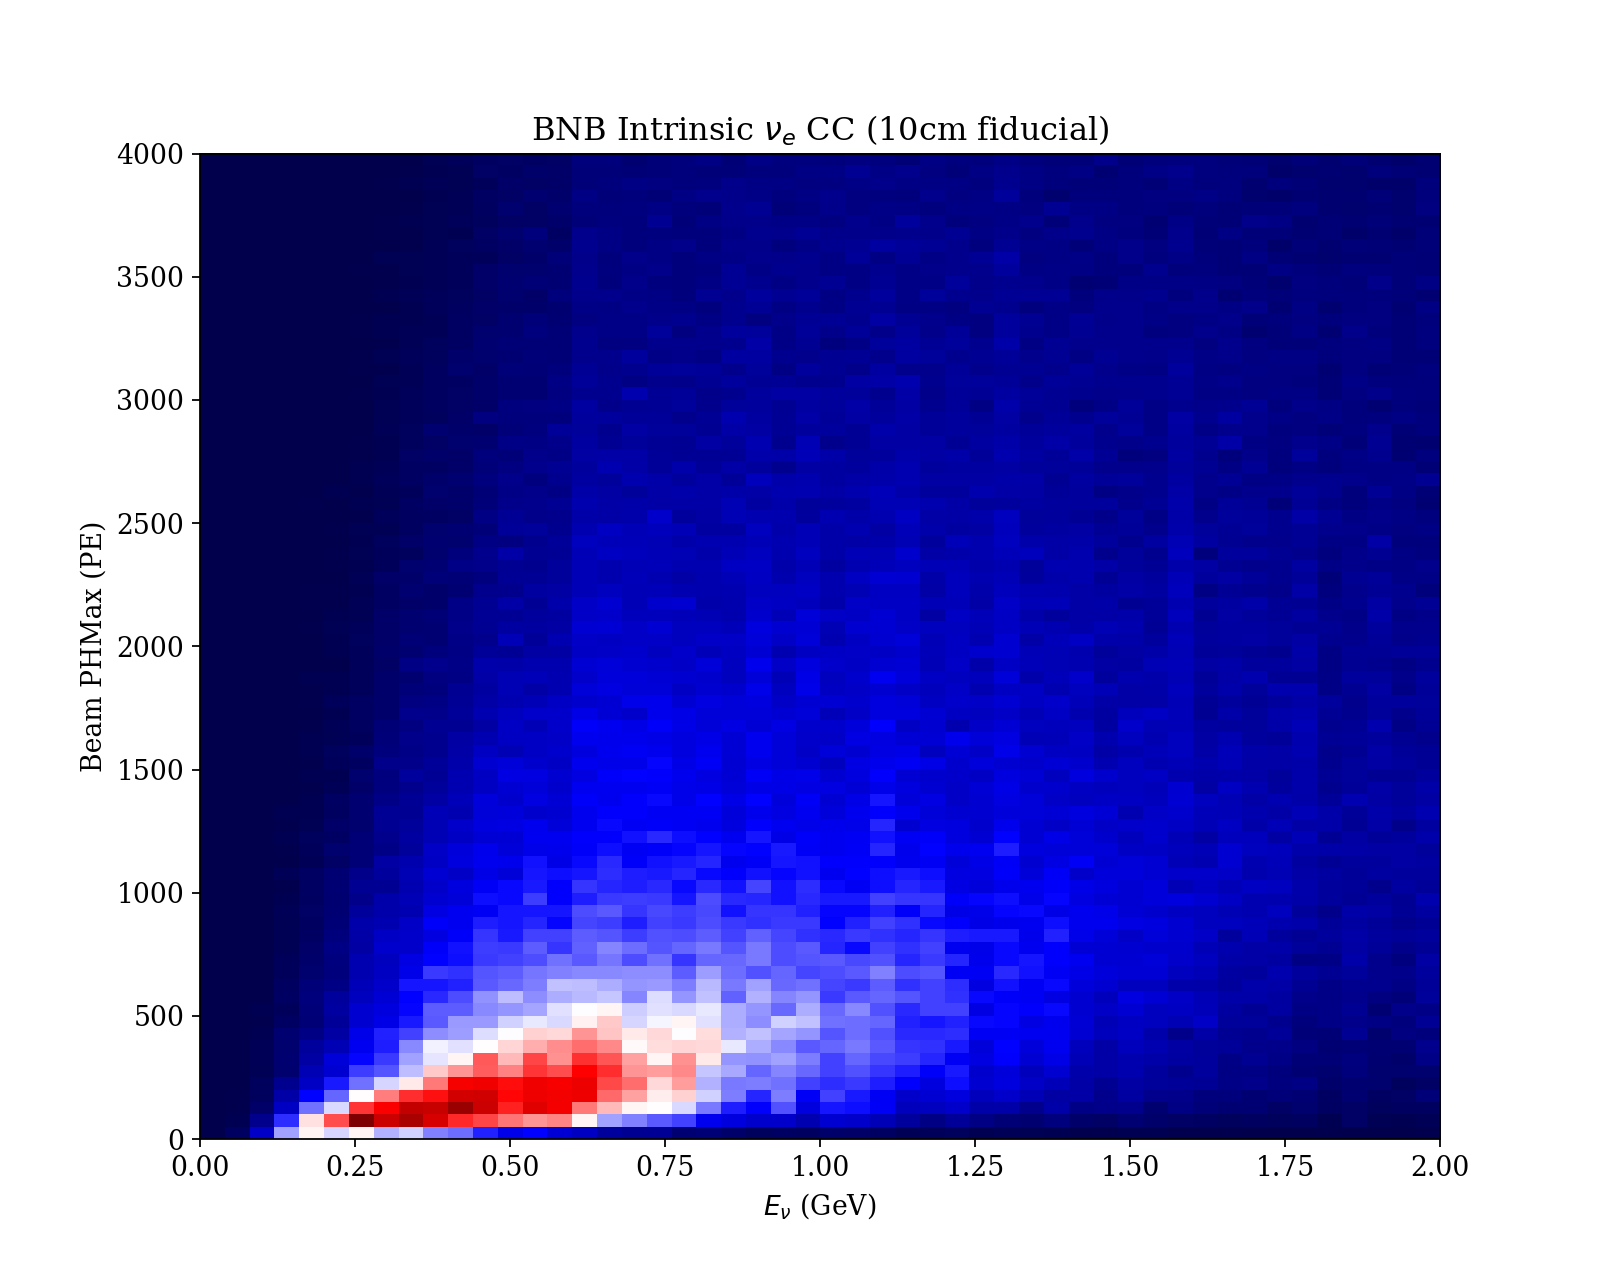

In [21]:
#my_df=df_ev.query("start_x>min_x+10.0 and start_x<max_x-10.0 and start_y>min_y+10.0 and start_y<max_y-10.0 and start_z>min_z+10.0 and start_z<max_z-10.0")

fig,axes = plt.subplots()

axes.hist2d(my_df["e"],my_df["pe_beam"],bins=[50,80],range=[[0.,2.],[0,4000]])
plt.title("BNB Intrinsic $\\nu_e$ CC (10cm fiducial)")
axes.set_xlabel("$E_\\nu$ (GeV)")
axes.set_ylabel("Beam PHMax (PE)")
plt.show()
#plt.savefig("plots/genie_1mu1p_costheta_v_enu.pdf")

<IPython.core.display.Javascript object>


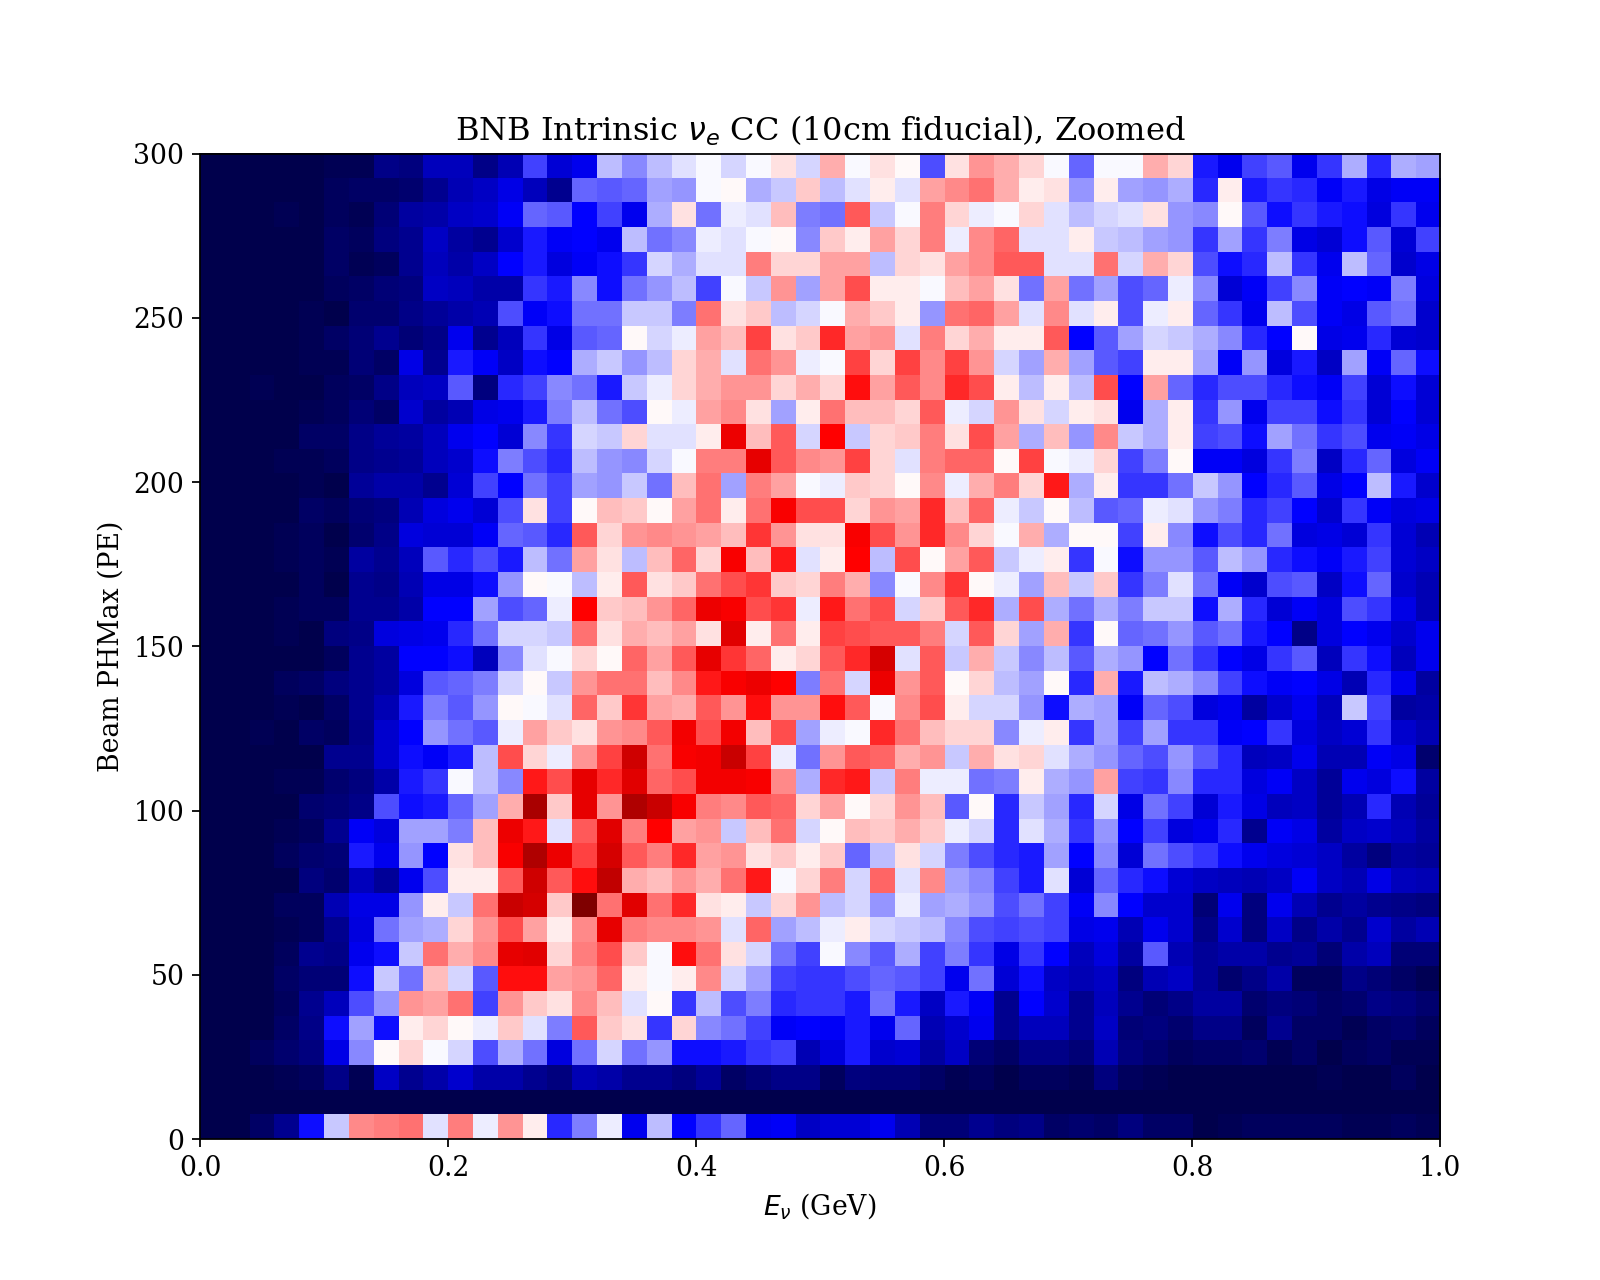

In [58]:
fig,axes = plt.subplots()

axes.hist2d(my_df["e"],my_df["pe_beam"],bins=[50,40],range=[[0.,1.],[0,300]])
plt.title("BNB Intrinsic $\\nu_e$ CC (10cm fiducial), Zoomed")
axes.set_xlabel("$E_\\nu$ (GeV)")
axes.set_ylabel("Beam PHMax (PE)")
plt.show()
#plt.savefig("plots/genie_1mu1p_costheta_v_enu.pdf")

<IPython.core.display.Javascript object>


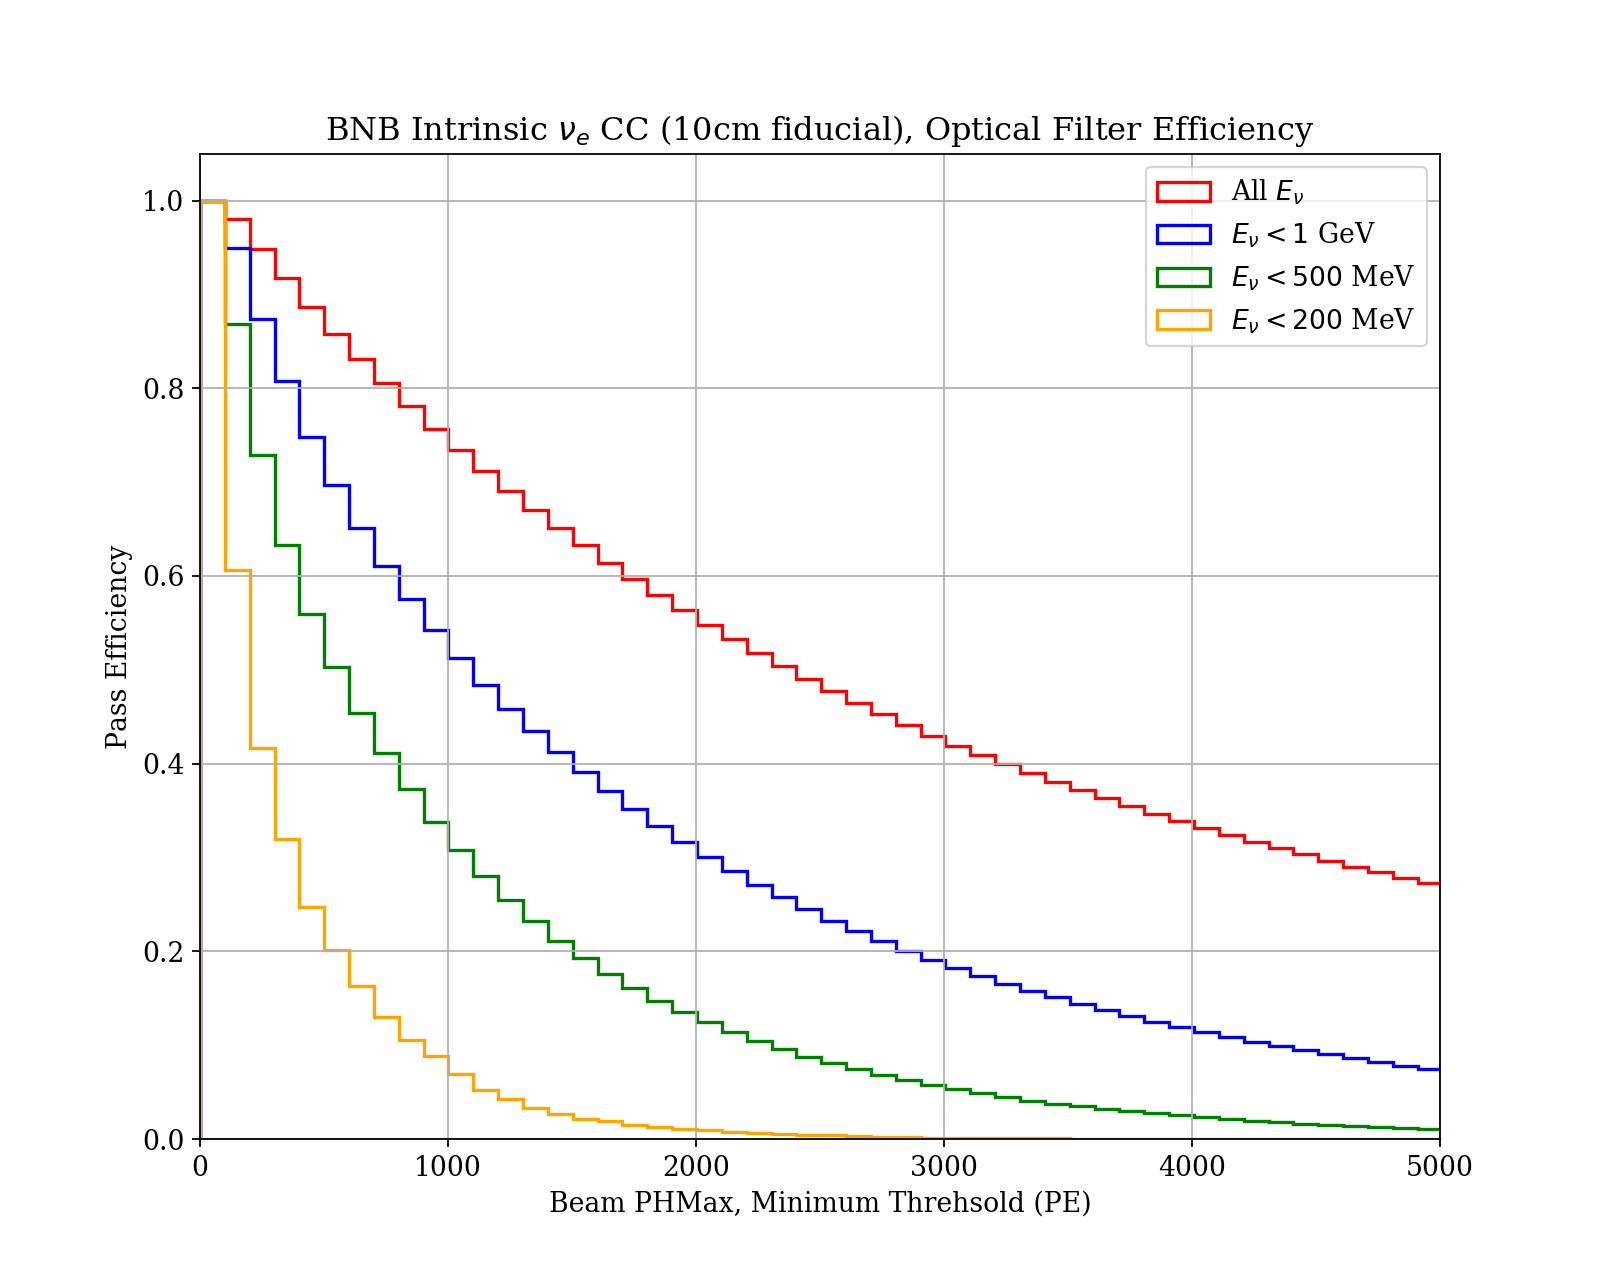

In [26]:
fig,axes = plt.subplots()

bins_pe_beam = np.linspace(0.0,50000,500)
plt.grid()
plt.title("BNB Intrinsic $\\nu_e$ CC (10cm fiducial), Optical Filter Efficiency")
axes.hist(my_df["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='r',label='All $E_\\nu$',**pltops_hist)
axes.hist(my_df.query("e<1.0")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='b',label='$E_\\nu<1$ GeV',**pltops_hist)
axes.hist(my_df.query("e<0.5")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='g',label='$E_\\nu<500$ MeV',**pltops_hist)
axes.hist(my_df.query("e<0.2")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='orange',label='$E_\\nu<200$ MeV',**pltops_hist)
axes.set_xlim(0.0,5000)
axes.set_ylabel("Pass Efficiency")
axes.set_xlabel("Beam PHMax, Minimum Threhsold (PE)")
plt.legend()
plt.show()
#plt.savefig("plots/genie_1mu1p_costheta_v_enu.pdf")

<IPython.core.display.Javascript object>


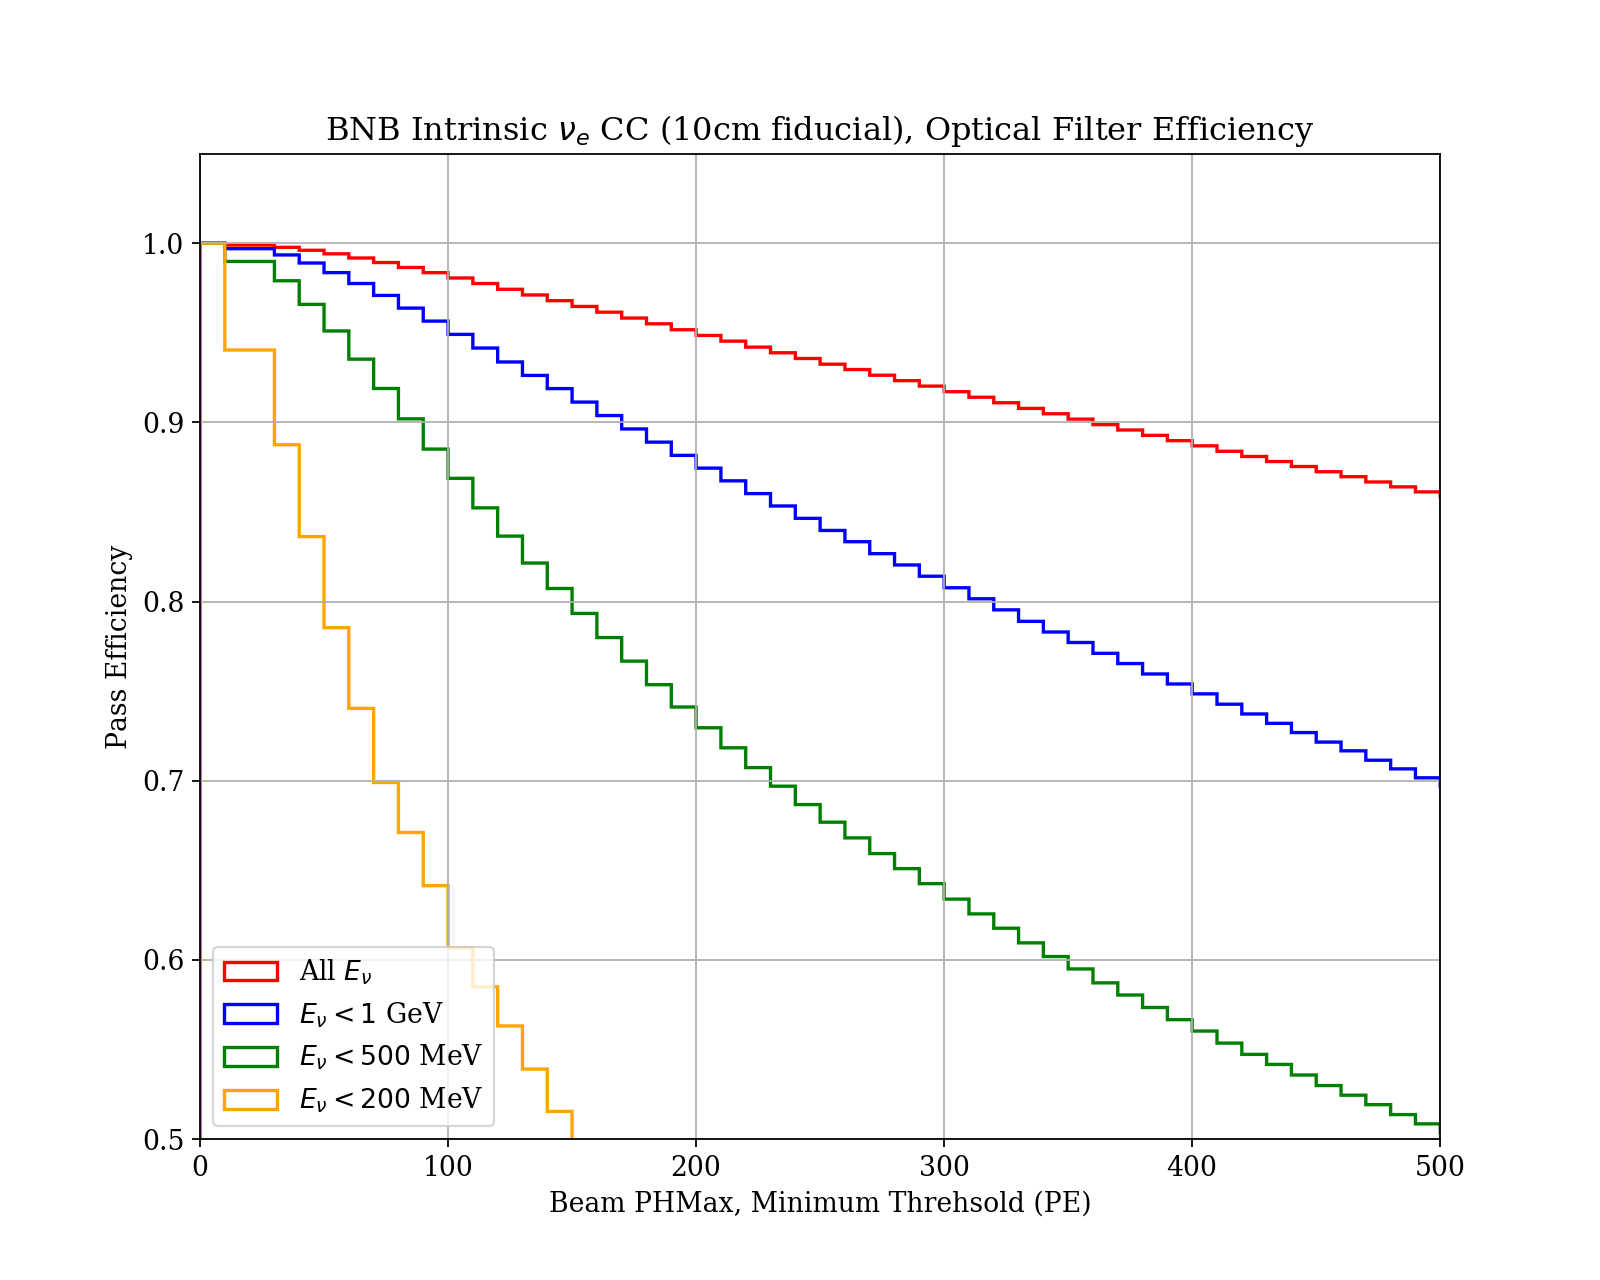

In [27]:
fig,axes = plt.subplots()

bins_pe_beam = np.linspace(0.0,50000,5000)
plt.grid()
plt.title("BNB Intrinsic $\\nu_e$ CC (10cm fiducial), Optical Filter Efficiency")
axes.hist(my_df["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='r',label='All $E_\\nu$',**pltops_hist)
axes.hist(my_df.query("e<1.0")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='b',label='$E_\\nu<1$ GeV',**pltops_hist)
axes.hist(my_df.query("e<0.5")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='g',label='$E_\\nu<500$ MeV',**pltops_hist)
axes.hist(my_df.query("e<0.2")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='orange',label='$E_\\nu<200$ MeV',**pltops_hist)
axes.set_xlim(0.0,500)
axes.set_ylim(0.5,1.05)
axes.set_ylabel("Pass Efficiency")
axes.set_xlabel("Beam PHMax, Minimum Threhsold (PE)")
plt.legend(loc=3)
plt.show()
plt.savefig("plots/nue_opfilter_eff_zoom.pdf")

<IPython.core.display.Javascript object>


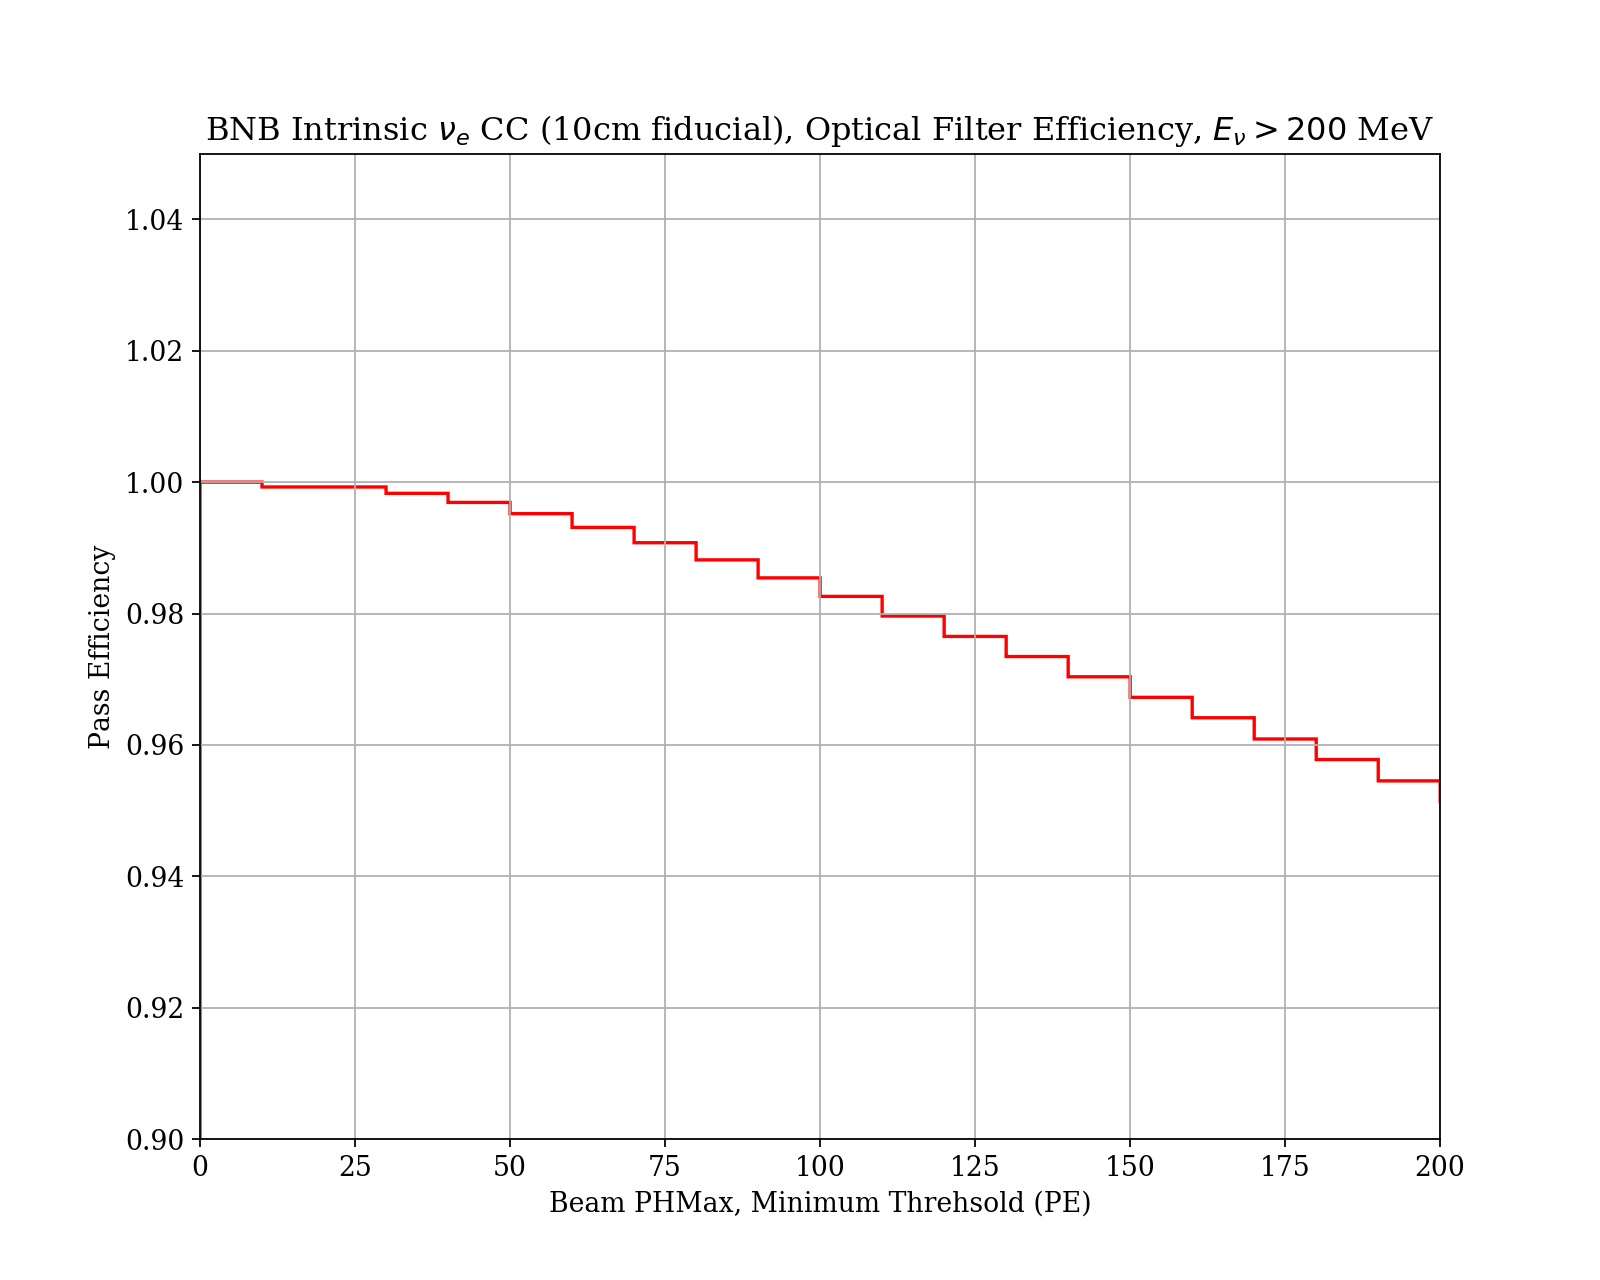

In [33]:
fig,axes = plt.subplots()

bins_pe_beam = np.linspace(0.0,50000,5000)
plt.grid()
plt.title("BNB Intrinsic $\\nu_e$ CC (10cm fiducial), Optical Filter Efficiency, $E_\\nu>200$ MeV")
axes.hist(my_df.query("e>0.2")["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='r',**pltops_hist)
axes.set_xlim(0.0,200)
axes.set_ylim(0.9,1.05)
axes.set_ylabel("Pass Efficiency")
axes.set_xlabel("Beam PHMax, Minimum Threhsold (PE)")
#plt.legend(loc=3)
plt.show()
plt.savefig("plots/nue_opfilter_eff_e_gt_200MeV.pdf")

In [ ]:
total_x_span = max_x-min_x
x_q1_lo = min_x
x_q1_hi = x_q1_lo+total_x_span*0.25
x_q2_lo = x_q1_hi
x_q2_hi = x_q2_lo+total_x_span*0.25
x_q3_lo = x_q2_hi
x_q3_hi = x_q3_lo+total_x_span*0.25
x_q4_lo = x_q3_hi
x_q4_hi = x_q4_lo+total_x_span*0.25

fig,axes = plt.subplots()

bins_pe_beam = np.linspace(0.0,50000,5000)
plt.grid()
plt.title("BNB Intrinsic $\\nu_e$ CC (10cm fiducial), Optical Filter Efficiency, $E_\\nu<500$ MeV")
axes.hist(my_df.query("e<0.5 and start_x>%f and start_x<%f"%(x_q1_lo,x_q1_hi))["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='r',label='$%2.1f cm < x < %2.1f cm$'%(x_q1_lo,x_q1_hi),**pltops_hist)
axes.hist(my_df.query("e<0.5 and start_x>%f and start_x<%f"%(x_q2_lo,x_q2_hi))["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='b',label='$%2.1f cm < x < %2.1f cm$'%(x_q2_lo,x_q2_hi),**pltops_hist)
axes.hist(my_df.query("e<0.5 and start_x>%f and start_x<%f"%(x_q3_lo,x_q3_hi))["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='g',label='$%2.1f cm < x < %2.1f cm$'%(x_q3_lo,x_q3_hi),**pltops_hist)
axes.hist(my_df.query("e<0.5 and start_x>%f and start_x<%f"%(x_q4_lo,x_q4_hi))["pe_beam"],bins=bins_pe_beam,cumulative=-1,density=True,color='orange',label='$%2.1f cm < x < %2.1f cm$'%(x_q4_lo,x_q4_hi),**pltops_hist)
axes.set_xlim(0.0,500)
axes.set_ylim(0.5,1.05)
axes.set_ylabel("Pass Efficiency")
axes.set_xlabel("Beam PHMax, Minimum Threhsold (PE)")
plt.legend(loc=3)
plt.show()
plt.savefig("plots/nue_opfilter_eff_xlines.pdf")

In [ ]:
df_ev.query("pe_beam<10")[["e","start_x","start_y","start_z","start_t"]]

In [34]:
print np.min(df_ev["start_x"])
print np.max(df_ev["start_x"])
print np.min(df_ev["start_y"])
print np.max(df_ev["start_y"])
print np.max(df_ev["start_z"])
print np.min(df_ev["start_z"])

-1.5497034
254.79988
-115.53
117.469986
1036.8993
0.10087221


In [35]:
np.mean(df_ev["pe_beam"])

3740.2925

In [ ]:
fig,axes = plt.subplots(2)

hden, xedge, yedge, im = axes[0].hist2d(my_df["start_x"],my_df["ke_e"],bins=[50,50],range=[[0.,250.],[0,1.0]])
hnum, xedge, yedge, im  = axes[1].hist2d(my_df.query("pe_beam>2000.0")["start_x"],my_df.query("pe_beam>2000.0")["ke_e"],bins=[50,50],range=[[0.,250.],[0,1.0]])
plt.show()


<IPython.core.display.Javascript object>


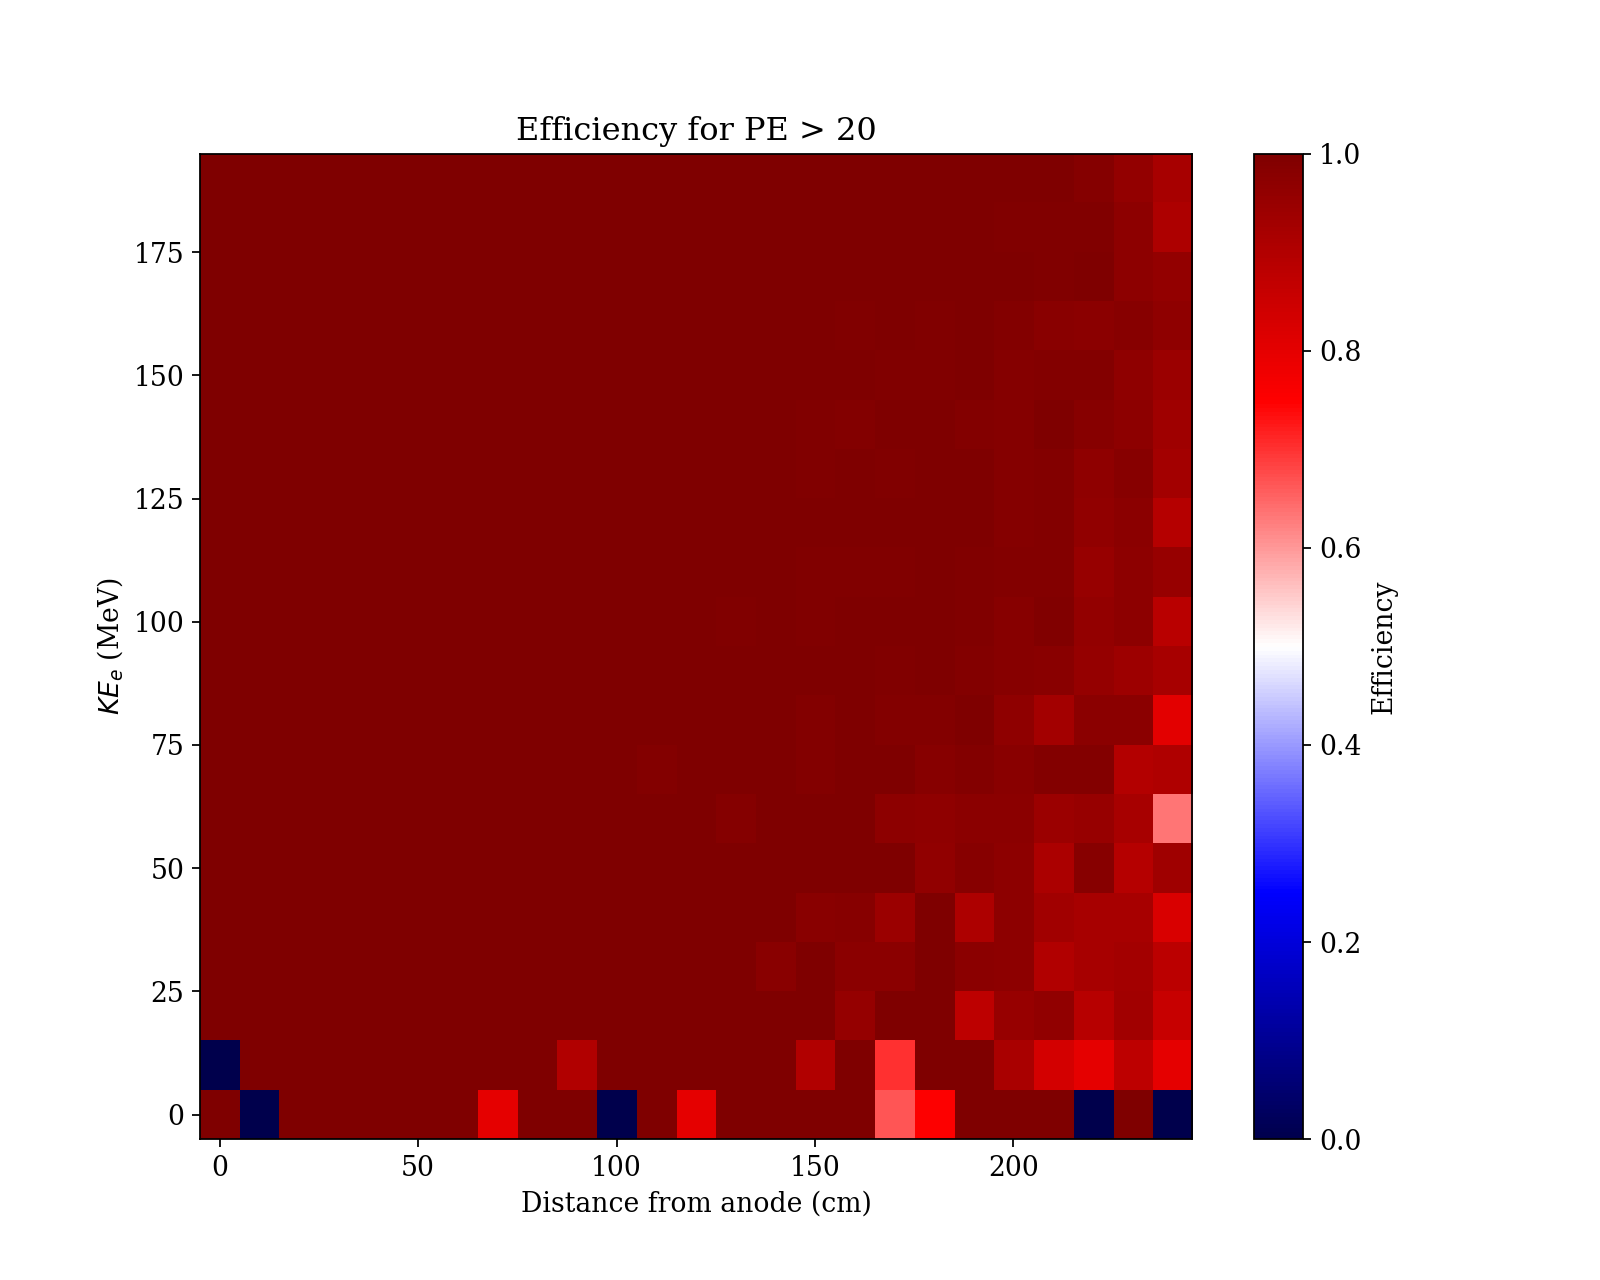

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [44]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["ke_e"],bins=[25,20],range=[[0.,250.],[0,0.2]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>20.0")["start_x"],my_df.query("pe_beam>20.0")["ke_e"],bins=[25,20],range=[[0.,250.],[0,0.2]])

heff = np.nan_to_num(hnum/hden)
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")

plt.colorbar(label='Efficiency')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$KE_e$ (MeV)')
plt.title("Efficiency for PE > 20")
plt.show()
plt.savefig("plots/nue_opfilter_eff_electron_ke_vs_x_pe20.pdf")

<IPython.core.display.Javascript object>


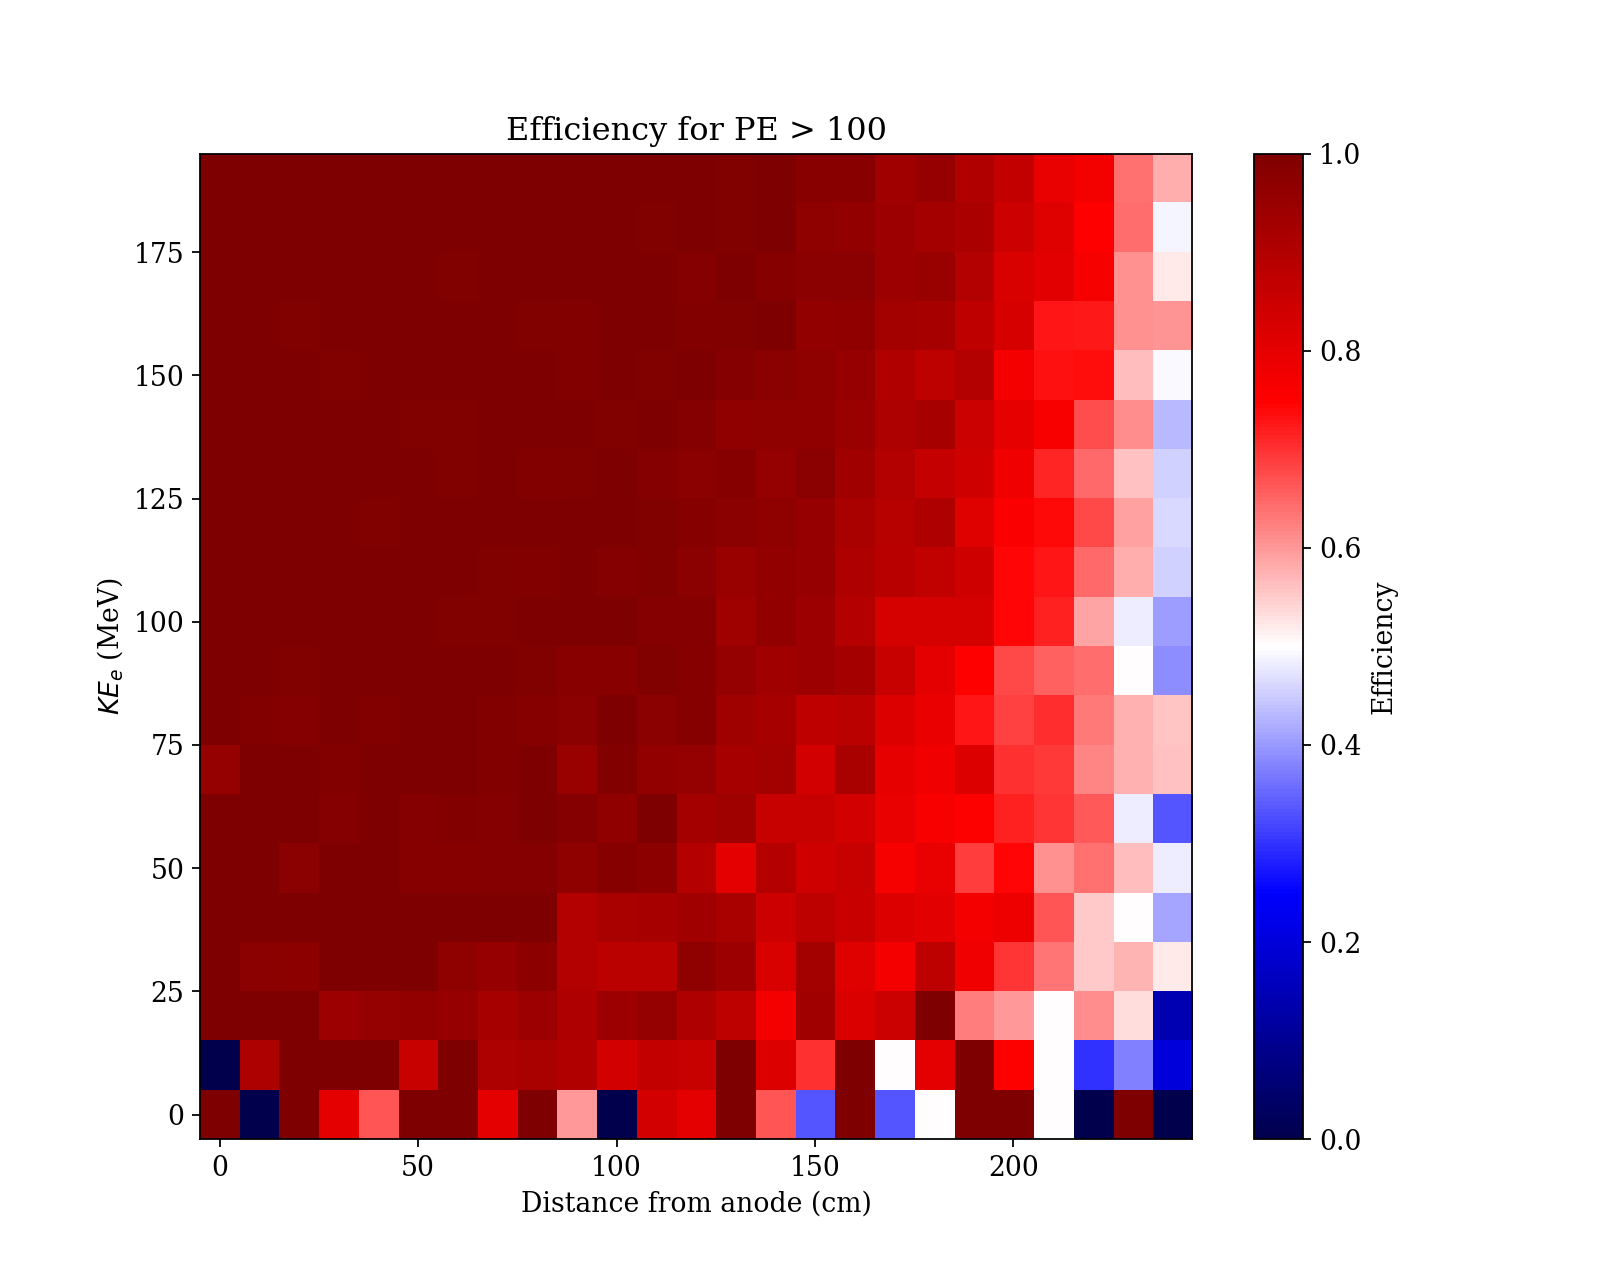

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [45]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["ke_e"],bins=[25,20],range=[[0.,250.],[0,0.2]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>100.0")["start_x"],my_df.query("pe_beam>100.0")["ke_e"],bins=[25,20],range=[[0.,250.],[0,0.2]])

heff = np.nan_to_num(hnum/hden)
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")

plt.colorbar(label='Efficiency')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$KE_e$ (MeV)')
plt.title("Efficiency for PE > 100")
plt.show()
plt.savefig("plots/nue_opfilter_eff_electron_ke_vs_x_pe100.pdf")

<IPython.core.display.Javascript object>


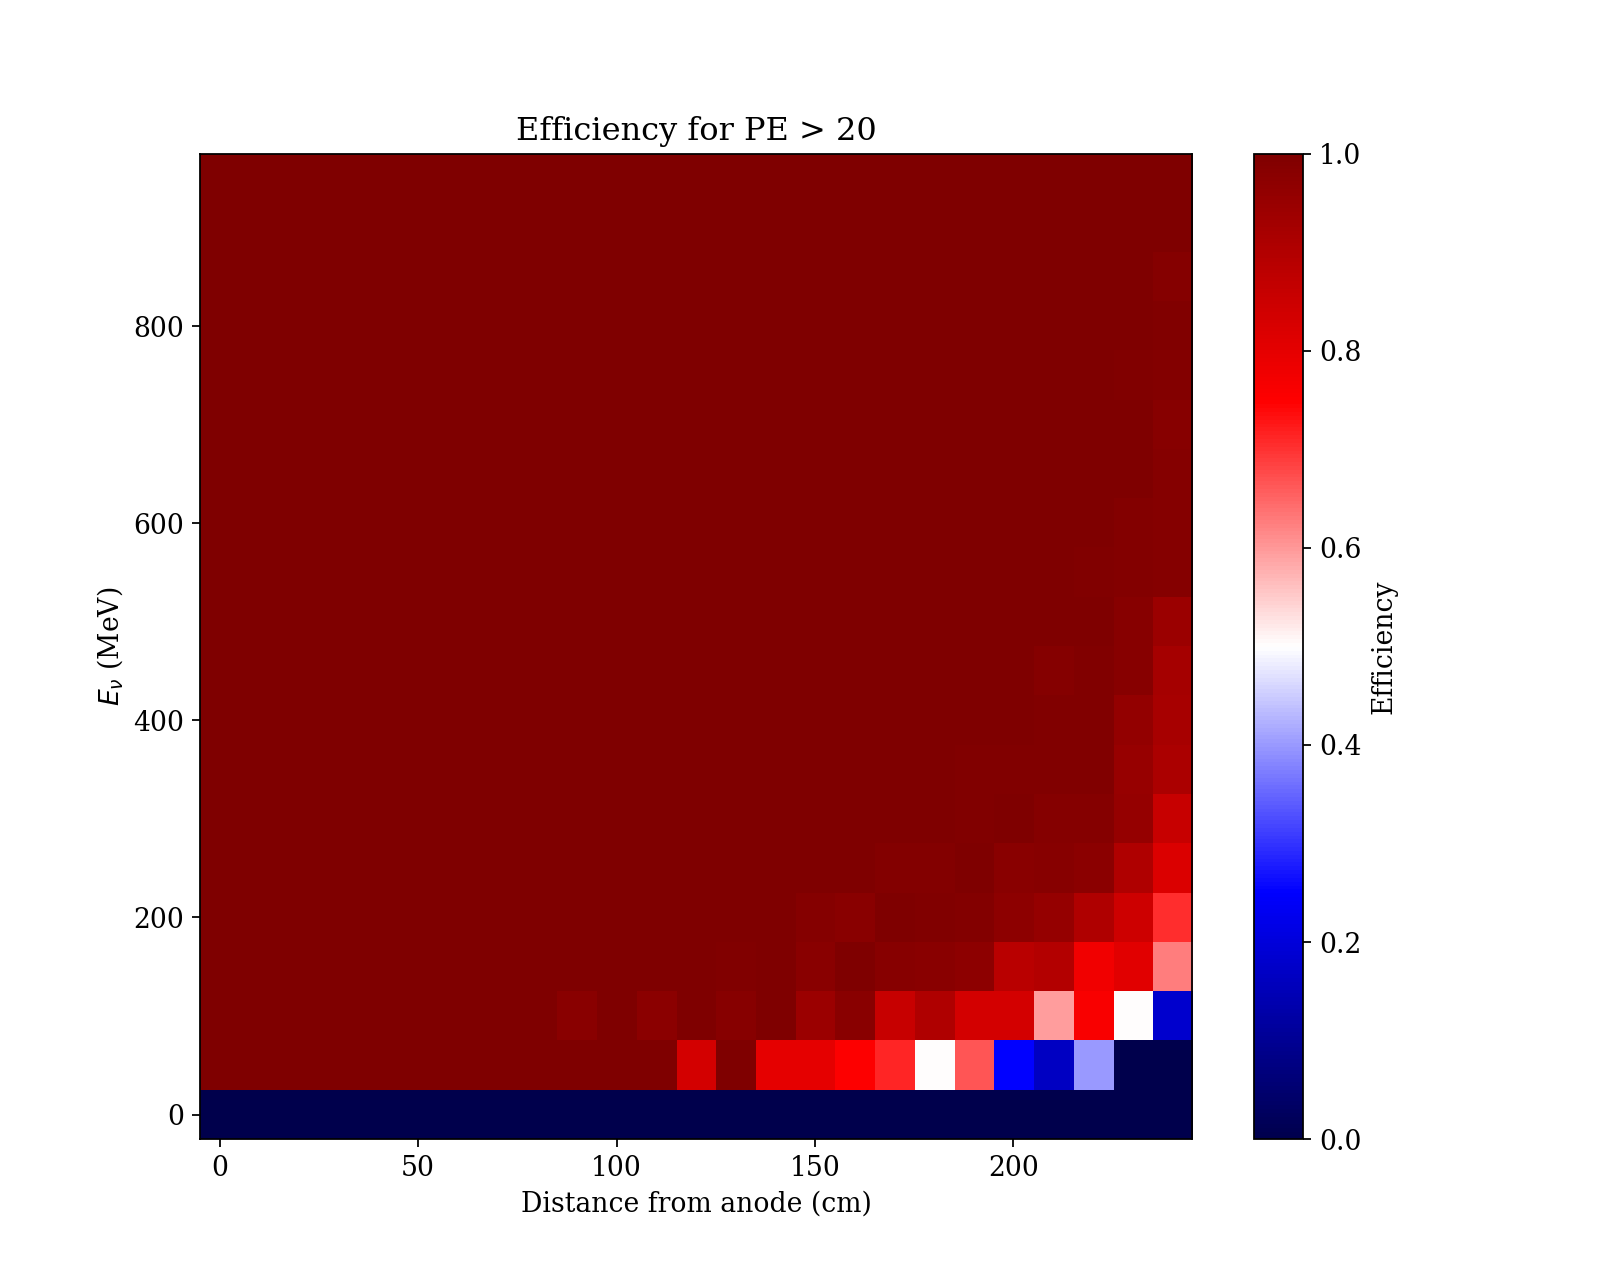

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [47]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>20.0")["start_x"],my_df.query("pe_beam>20.0")["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])

heff = np.nan_to_num(hnum/hden)
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")

plt.colorbar(label='Efficiency')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$E_\\nu$ (MeV)')
plt.title("Efficiency for PE > 20")
plt.show()
plt.savefig("plots/nue_opfilter_eff_nue_e_vs_x_pe20.pdf")

<IPython.core.display.Javascript object>


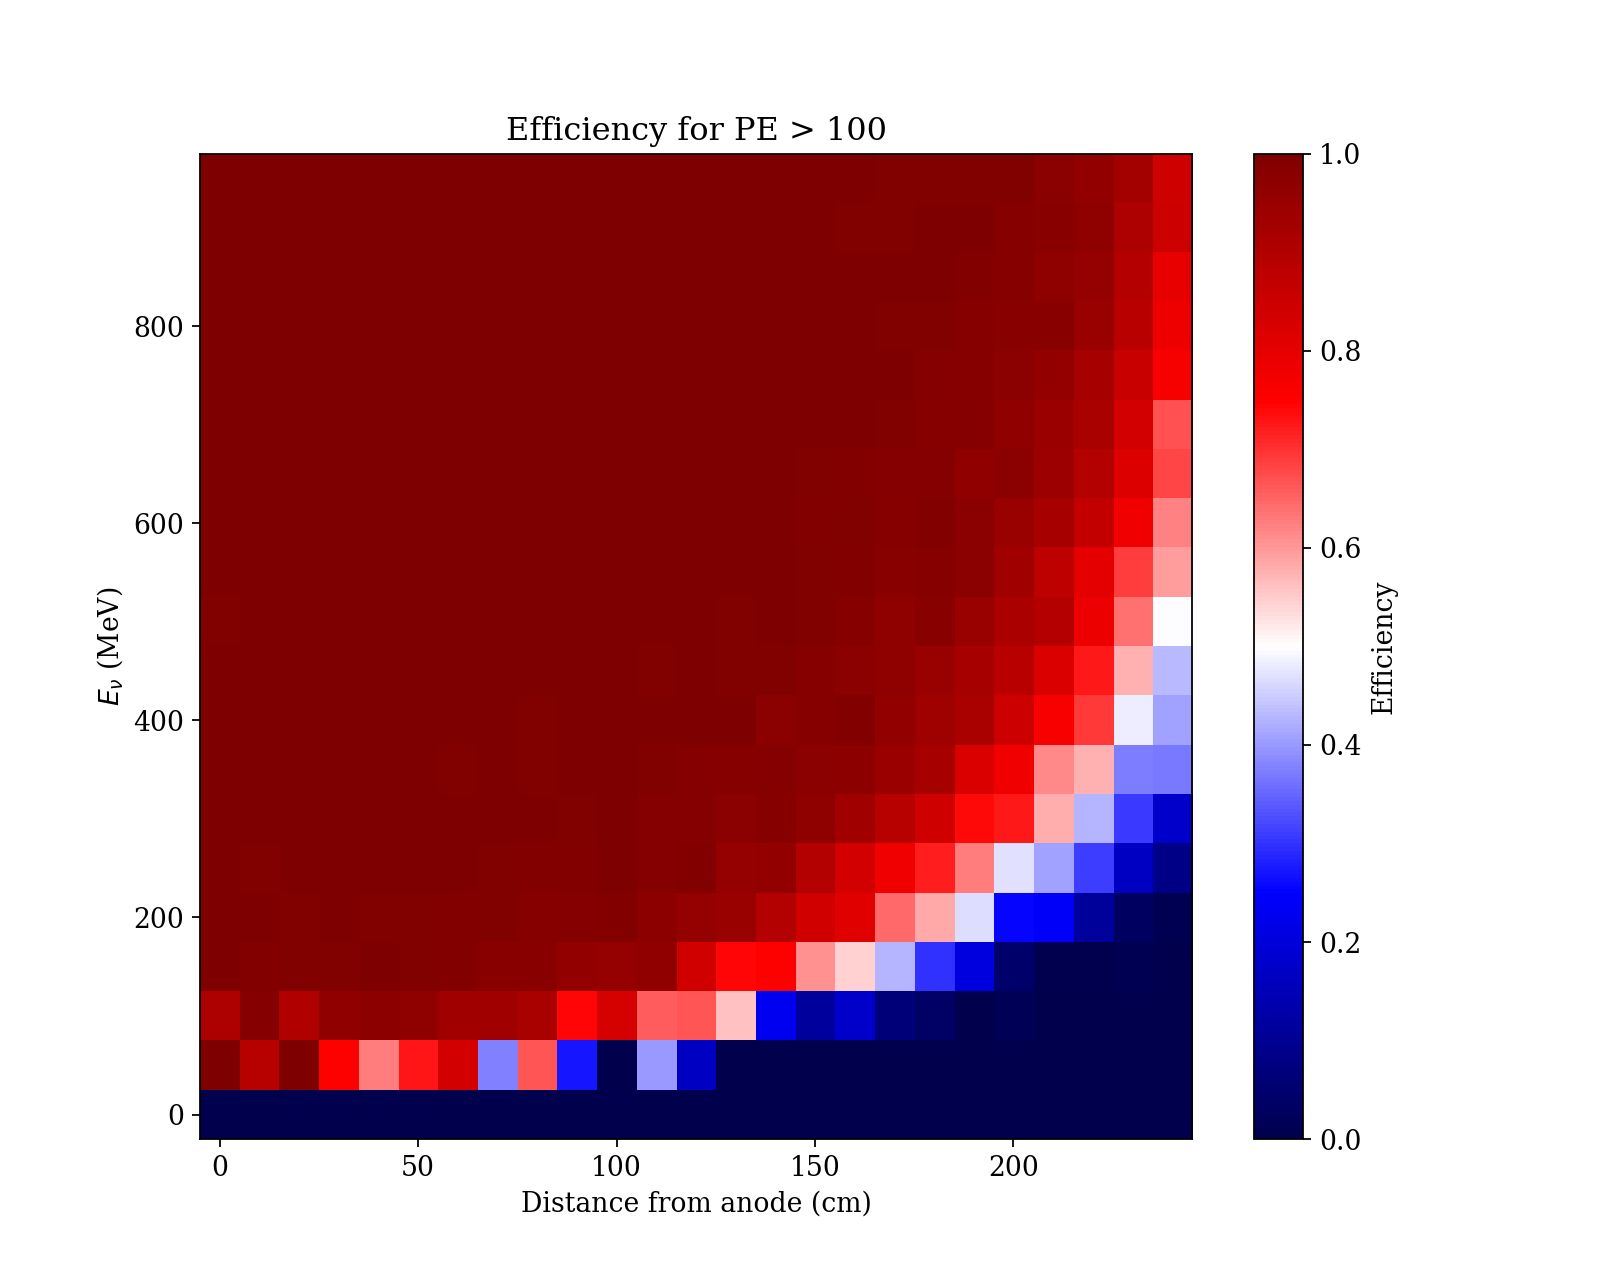

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [48]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>100.0")["start_x"],my_df.query("pe_beam>100.0")["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])

heff = np.nan_to_num(hnum/hden)
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")

plt.colorbar(label='Efficiency')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$E_\\nu$ (MeV)')
plt.title("Efficiency for PE > 100")
plt.show()
plt.savefig("plots/nue_opfilter_eff_nue_e_vs_x_pe100.pdf")

<IPython.core.display.Javascript object>


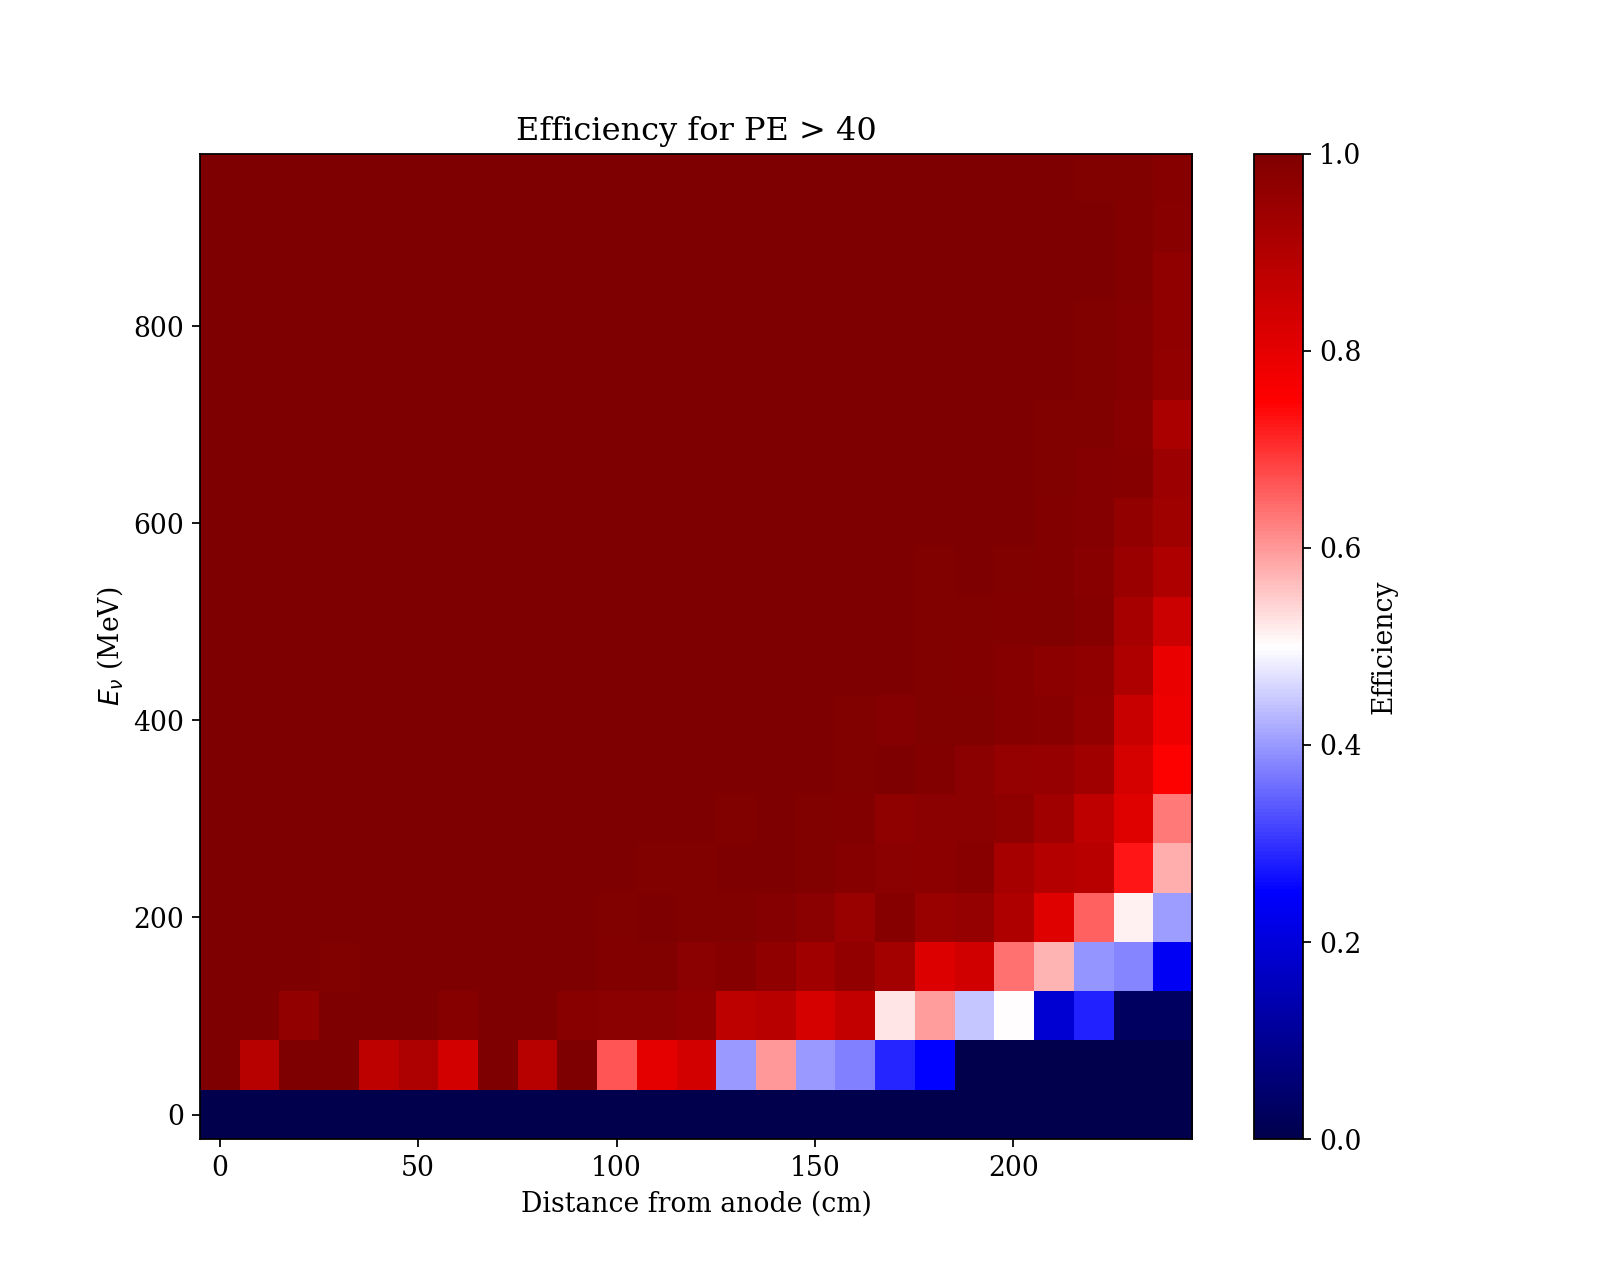

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [49]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>40.0")["start_x"],my_df.query("pe_beam>40.0")["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])

heff = np.nan_to_num(hnum/hden)
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")

plt.colorbar(label='Efficiency')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$E_\\nu$ (MeV)')
plt.title("Efficiency for PE > 40")
plt.show()
plt.savefig("plots/nue_opfilter_eff_nue_e_vs_x_pe40.pdf")

<IPython.core.display.Javascript object>


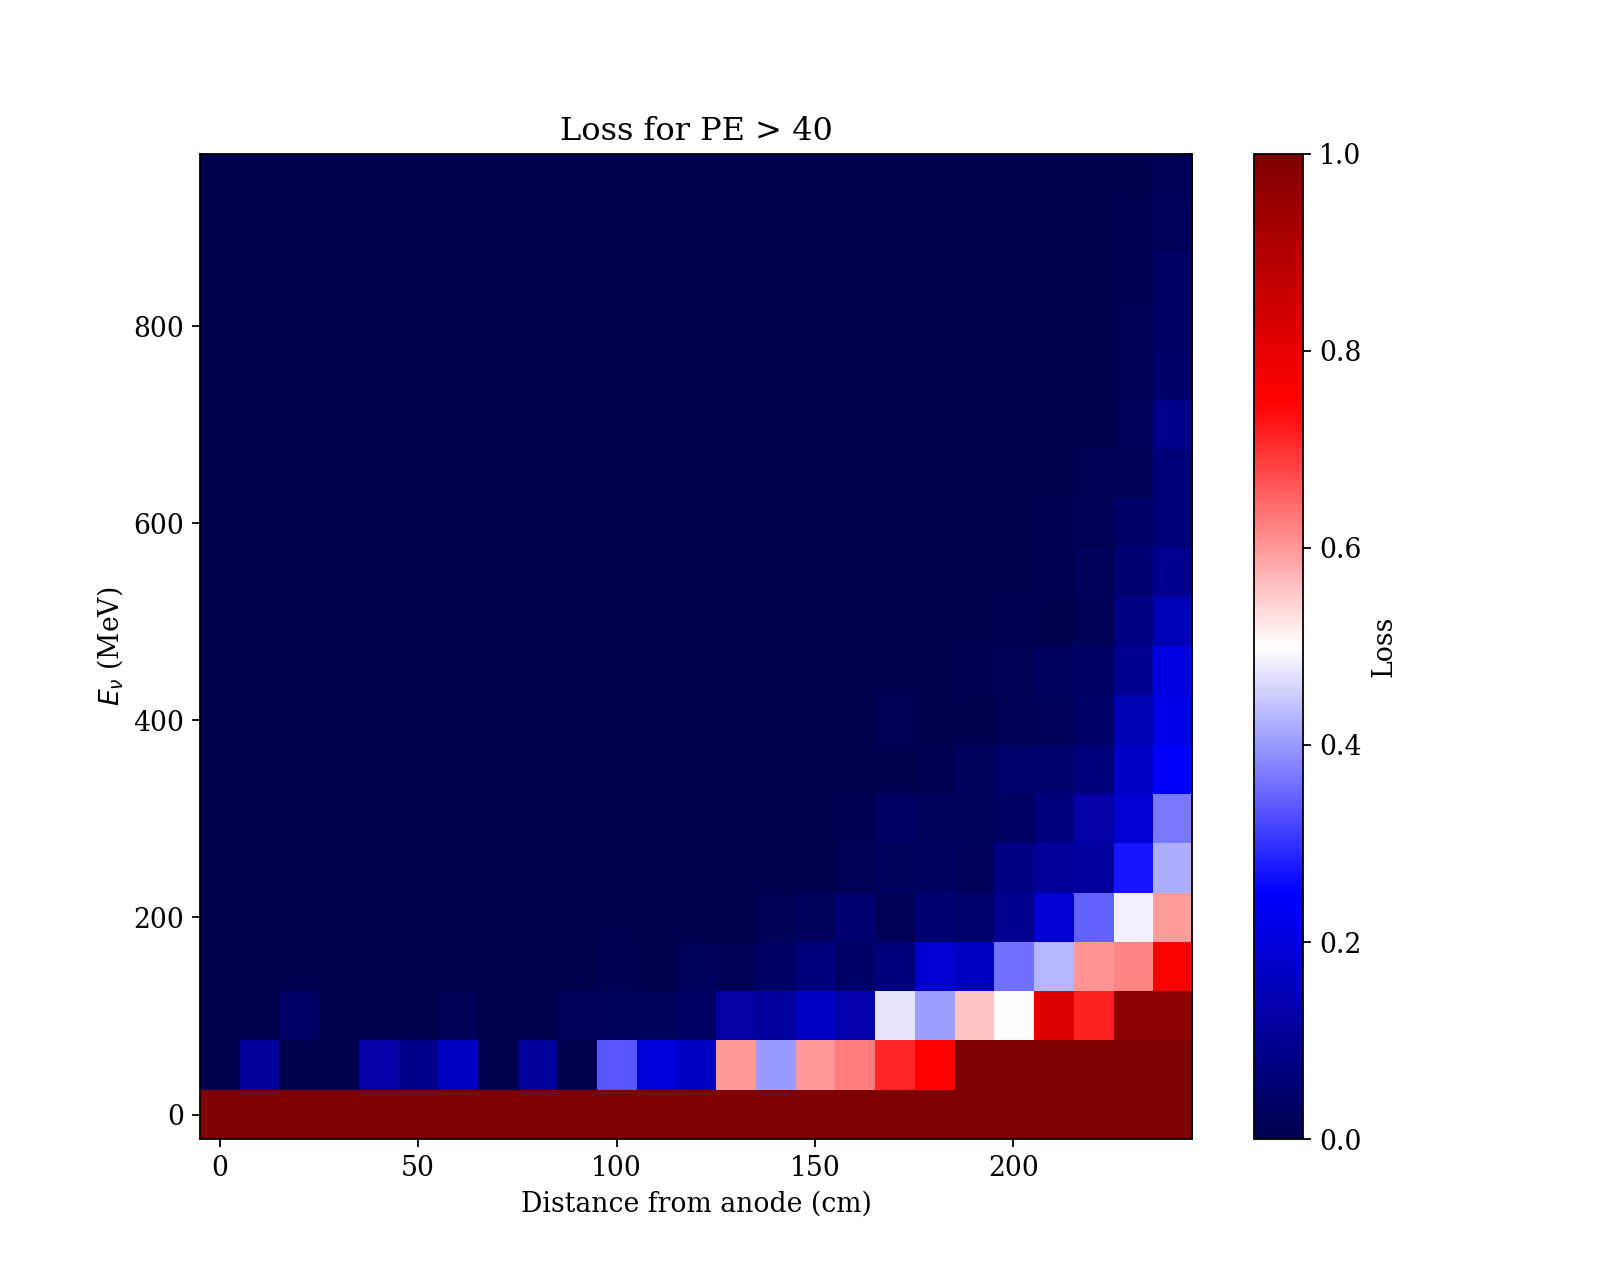

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [57]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>40.0")["start_x"],my_df.query("pe_beam>40.0")["e"],bins=[25,20],range=[[0.,250.],[0,1.0]])

heff = np.nan_to_num(hnum/hden)
#heff[np.isnan(heff)]=1.0
heff = 1.0 - heff
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")
plt.colorbar(label='Loss')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$E_\\nu$ (MeV)')
plt.title("Loss for PE > 40")
plt.show()
plt.savefig("plots/nue_opfilter_loss_nue_e_vs_x_pe40.pdf")

In [ ]:
fig,axes = plt.subplots()

hden, xedge, yedge, im = axes.hist2d(my_df["start_x"],my_df["ke_e"],bins=[20,20],range=[[0.,250.],[0,0.2]])
hnum, xedge, yedge, im  = axes.hist2d(my_df.query("pe_beam>400.0")["start_x"],my_df.query("pe_beam>400.0")["ke_e"],bins=[20,20],range=[[0.,250.],[0,0.2]])

heff = np.nan_to_num(hnum/hden)
heff = np.transpose(heff)
bwidthx = xedge[1]-xedge[0]
bwidthy = yedge[1]-yedge[0]
extent = (xedge[0]-0.5*bwidthx, xedge[-1]-0.5*bwidthx, (yedge[0]-0.5*bwidthy)*1000., (yedge[-1]-0.5*bwidthy)*1000.)
plt.clf()
plt.imshow(heff, origin="lower",extent=extent,aspect="auto")

plt.colorbar(label='Efficiency')
plt.xlabel('Distance from anode (cm)')
plt.ylabel('$KE_e$ (MeV)')
plt.show()
plt.savefig("plots/nue_opfilter_eff_electron_ke_vs_x.pdf")

In [ ]:
print heff

In [ ]:
xedge[0]

In [ ]:
extent=(hden[1][0],hden[1][-1],hden[2][0],hden[2][-1])
print extent

In [ ]:
print heff.shape
print hden[1].size-1

In [ ]:
xarr=np.array([])
yarr=np.array([])
zarr=np.array([])
for ix in range(hden[1].size-1):
    x=0.5*(hden[1][ix+1]-hden[1][ix])+hden[1][ix]
    for iy in range(hden[2].size-1):
        y=0.5*(hden[2][iy+1]-hden[2][iy])+hden[2][iy]
        xarr=np.append(xarr,x)
        yarr=np.append(yarr,y)
        zarr=np.append(zarr,hden[0][ix][iy])
arr, yarr = np.meshgrid(xarr, yarr)

In [ ]:


from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(hden[1][0:50],hden[2][0:50],heff,rstride=1, cmap=cm.jet, cstride=1,
        linewidth=0, antialiased=False)
plt.show()